# Fire Modeling

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

## Crazy cool stuff from Eli/ChatGPT

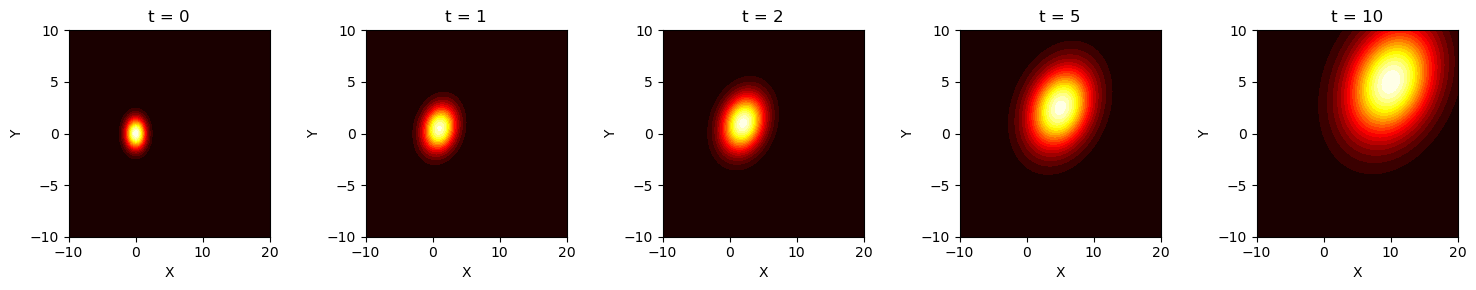

In [4]:
# Define parameters
x0, y0 = 0, 0   # Initial fire location
w1, w2 = 1, 0.5  # Wind vector
sigma0 = 1       # Initial standard deviation
k = 2            # Growth rate in wind direction
c = 1            # Growth rate perpendicular to wind
t_values = [0, 1, 2, 5, 10]  # Time steps to visualize

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute wind unit vectors
wind_mag = np.sqrt(w1**2 + w2**2)
u_x, u_y = w1 / wind_mag, w2 / wind_mag  # Wind direction unit vector
u_perp_x, u_perp_y = -u_y, u_x          # Perpendicular direction unit vector

# Plot for each time step
fig, axes = plt.subplots(1, len(t_values), figsize=(15, 3))
for i, t in enumerate(t_values):
    mean = [x0 + w1 * t, y0 + w2 * t]  # Moving fire center
    
    # Compute time-dependent variances
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal(mean, Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Plot heatmap
    ax = axes[i]
    ax.contourf(X, Y, 1*Z, levels=20, cmap='hot')
    ax.set_title(f't = {t}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-10, 20)
    ax.set_ylim(-10, 10)
    
plt.tight_layout()
plt.show()

### Animate it

MovieWriter imagemagick unavailable; using Pillow instead.


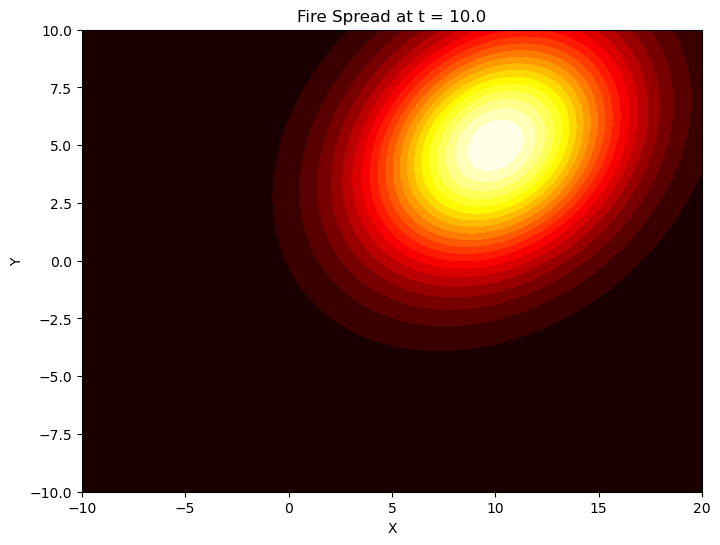

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

# Define parameters
x0, y0 = 0, 0   # Initial fire location
w1, w2 = 1, 0.5  # Wind vector
sigma0 = 1       # Initial standard deviation
k = 2            # Growth rate in wind direction
c = 1            # Growth rate perpendicular to wind
t_values = np.linspace(0, 10, 100)  # Time steps for animation

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute wind unit vectors
wind_mag = np.sqrt(w1**2 + w2**2)
u_x, u_y = w1 / wind_mag, w2 / wind_mag  # Wind direction unit vector
u_perp_x, u_perp_y = -u_y, u_x          # Perpendicular direction unit vector

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Initialize contour plot
contour = None

def update(t):
    global contour
    # Clear previous contour
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    # Compute new parameters
    mean = [x0 + w1 * t, y0 + w2 * t]
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, 
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), 
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal(mean, Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Update contour plot
    contour = ax.contourf(X, Y, Z, levels=20, cmap='hot')
    ax.set_title(f'Fire Spread at t = {t:.1f}')
    return contour.collections

# Create animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=t_values,
    blit=True,  # Use blitting for efficiency
    interval=50,  # Update every 50 ms
    repeat=True
)

ani.save('fire_spread.gif', writer='imagemagick', fps=20)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
x0, y0 = 0, 0
w1, w2 = 1, 0.5
sigma0 = 1
k = 2
c = 1
times_to_save = [0, 5]  # t = 0 and halfway

# Define the grid
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute wind unit vectors
wind_mag = np.sqrt(w1**2 + w2**2)
u_x, u_y = w1 / wind_mag, w2 / wind_mag
u_perp_x, u_perp_y = -u_y, u_x

def plot_frame(t, filename):
    fig = plt.figure(figsize=(10, 7), facecolor='white')  # Light background
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-10, 20)
    ax.set_ylim(-10, 10)
    ax.set_zlim(0, 0.2)

    # Light background for axes and no spines
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True
    ax.xaxis.pane.set_facecolor((0.8, 0.8, 0.8, 1.0))  # Light gray
    ax.yaxis.pane.set_facecolor((0.8, 0.8, 0.8, 1.0))
    ax.zaxis.pane.set_facecolor((0.8, 0.8, 0.8, 1.0))

    # Remove axis lines (spines)
    ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Keep gridlines but remove tick labels
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_zticks(ax.get_zticks())

    ax.set_xticklabels([''] * len(ax.get_xticks()))
    ax.set_yticklabels([''] * len(ax.get_yticks()))
    ax.set_zticklabels([''] * len(ax.get_zticks()))


    ax.set_xlabel('X', fontsize=15, labelpad=10)
    ax.set_ylabel('Y', fontsize=15, labelpad=10)

    # Compute parameters
    mean = [x0 + w1 * t, y0 + w2 * t]
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t

    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp,
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp),
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])

    rv = multivariate_normal(mean, Sigma)
    Z = rv.pdf(np.dstack((X, Y)))

    surf = ax.plot_surface(X, Y, Z, cmap='hot', edgecolor='none')

    ax.set_title(f'Fire Spread at t = {t:.1f}', pad=20, fontsize=25)

    # Save with tight layout
    plt.tight_layout()
    fig.savefig(filename, dpi=600, bbox_inches='tight', facecolor=fig.get_facecolor())
    plt.close(fig)

# Save frames at t = 0 and t = 5
plot_frame(0, 'gaussian_fire_3d_t0.png')
plot_frame(5, 'gaussian_fire_3d_t5.png')

/var/folders/lc/6n3k9ht52fxdnv5mqyw8tngh0000gn/T/ipykernel_38011/1977165386.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


In [13]:
t_start = t_values[0]
t_mid = t_values[len(t_values) // 2]
# t_end = t_values[-1]

for label, t_snapshot in zip(["early", "mid"], [t_start, t_mid]):
    update(t_snapshot)
    fig.savefig(f"gaussian_fire_3d_{label}.png", dpi=600, bbox_inches='tight')

MovieWriter imagemagick unavailable; using Pillow instead.


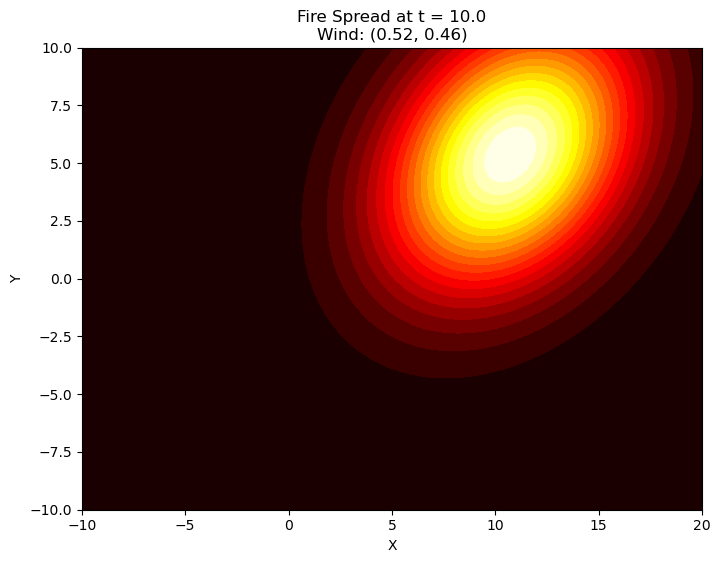

In [8]:
# Define parameters
x0, y0 = 0, 0        # Initial fire location
sigma0 = 1            # Initial standard deviation
k = 2                 # Growth rate in wind direction
c = 1                 # Growth rate perpendicular to wind
t_values = np.linspace(0, 10, 100)  # Time steps for animation

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
contour = None

def get_wind(t):
    """Time-varying wind vector with changing direction and magnitude"""
    w1 = 1 + 0.5*np.sin(0.5*t)  # Changing x-component
    w2 = 0.5 + 0.3*np.cos(0.8*t)  # Changing y-component
    return w1, w2

def update(t):
    global contour
    # Clear previous contour
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    # Get current wind vector
    w1, w2 = get_wind(t)
    
    # Compute wind direction unit vectors
    wind_mag = np.sqrt(w1**2 + w2**2)
    u_x, u_y = w1 / wind_mag, w2 / wind_mag
    u_perp_x, u_perp_y = -u_y, u_x
    
    # Compute fire center position (integrate wind over time)
    mean_x = x0 + (t - np.cos(0.5*t) + 1)  # Integral of w1 component
    mean_y = y0 + (0.5*t + 0.375*np.sin(0.8*t))  # Integral of w2 component
    
    # Compute time-dependent variances
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute rotated covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, 
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), 
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal([mean_x, mean_y], Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Update contour plot
    contour = ax.contourf(X, Y, Z, levels=20, cmap='hot')
    ax.set_title(f'Fire Spread at t = {t:.1f}\nWind: ({w1:.2f}, {w2:.2f})')
    return contour.collections

# Create animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=t_values,
    blit=True,
    interval=50,
    repeat=True
)

ani.save('fire_spread_dynamic_wind.gif', writer='imagemagick', fps=20)

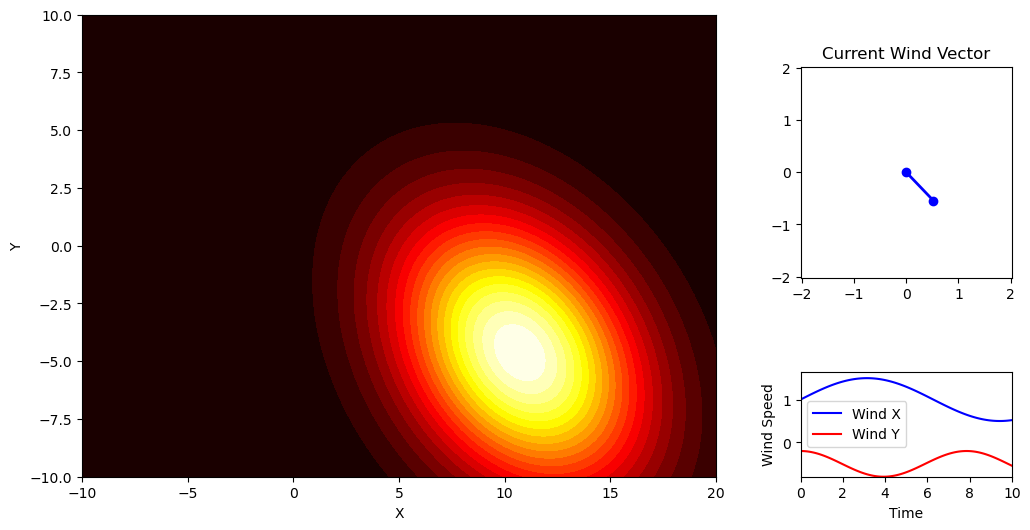

In [ ]:
np.seterr(invalid='ignore')

# Parameters
x0, y0 = 0, 0
sigma0 = 1
k = 2
c = 1
t_values = np.linspace(0, 10, 100)

w1_init = 1.0
w2_init = -0.5

# Windfun ction with minimum magnitude
def get_wind(t):
    w1 = w1_init + 0.5 * np.sin(0.5 * t)
    w2 = w2_init + 0.3 * np.cos(0.8 * t)
    mag = np.hypot(w1, w2)
    if mag < 0.1:
        return w1 / mag * 0.1, w2 / mag * 0.1
    else:
        return w1, w2

w1_list, w2_list = zip(*[get_wind(t) for t in t_values])

# Create figure and set up grid layout
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[3, 1])

# Main fire spread plot
main_ax = fig.add_subplot(gs[:, 0])
main_ax.set(xlim=(-10, 20), ylim=(-10, 10), xlabel='X', ylabel='Y')

# Wind vector plot (line-based)
vector_ax = fig.add_subplot(gs[0, 1])
max_wind = max(np.hypot(w1, w2) for w1, w2 in zip(w1_list, w2_list)) * 1.2
vector_ax.set(xlim=(-max_wind, max_wind), ylim=(-max_wind, max_wind),
              aspect='equal', title='Current Wind Vector')

# Wind evolution plot
wind_ax = fig.add_subplot(gs[1, 1])
wind_ax.set(xlim=(0, 10), 
            ylim=(min(min(w1_list), min(w2_list)), max(max(w1_list), max(w2_list)) * 1.1),
            xlabel='Time', ylabel='Wind Speed')
wind_line1, = wind_ax.plot([], [], 'b-', label='Wind X')
wind_line2, = wind_ax.plot([], [], 'r-', label='Wind Y')
wind_ax.legend()

# Create mesh grid for fire spread density plot
X, Y = np.meshgrid(np.linspace(-10, 20, 100), np.linspace(-10, 10, 100))
contour = None

def update(i):
    global contour
    t = t_values[i]
    w1, w2 = w1_list[i], w2_list[i]
    
    # Update the main fire plot
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    wind_mag = np.hypot(w1, w2)
    if wind_mag > 0:
        u_x, u_y = w1 / wind_mag, w2 / wind_mag
    else:
        u_x, u_y = 1, 0

    mean_x = x0 + (w1_init * t - np.cos(0.5 * t) + 1)
    mean_y = y0 + (w2_init * t + 0.375 * np.sin(0.8 * t))
    
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp,
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp),
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    rv = multivariate_normal([mean_x, mean_y], Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    contour = main_ax.contourf(X, Y, Z, levels=20, cmap='hot')
    
    # Update wind vector plot by clearing and replotting a line
    vector_ax.clear()
    vector_ax.set(xlim=(-max_wind, max_wind), ylim=(-max_wind, max_wind),
                  aspect='equal', title='Current Wind Vector')
    # Plot a line from (0,0) to (w1, w2)
    color = 'blue' if w1 >= 0 else 'red'
    vector_ax.plot([0, w1], [0, w2], color=color, linewidth=2, marker='o')
    
    # Update wind evolution plot
    wind_line1.set_data(t_values[:i+1], w1_list[:i+1])
    wind_line2.set_data(t_values[:i+1], w2_list[:i+1])
    
    # Return updated artists from the main and evolution plots.
    return [*contour.collections, wind_line1, wind_line2]

# Create animation without blitting to avoid redraw issues
ani = animation.FuncAnimation(
    fig, update, frames=len(t_values),
    interval=50, repeat=True
)

ani.save('fire_spread_with_wind.gif', writer='pillow', fps=20)
plt.show()


Simulating: 100%|██████████| 500/500 [00:00<00:00, 783.38it/s]


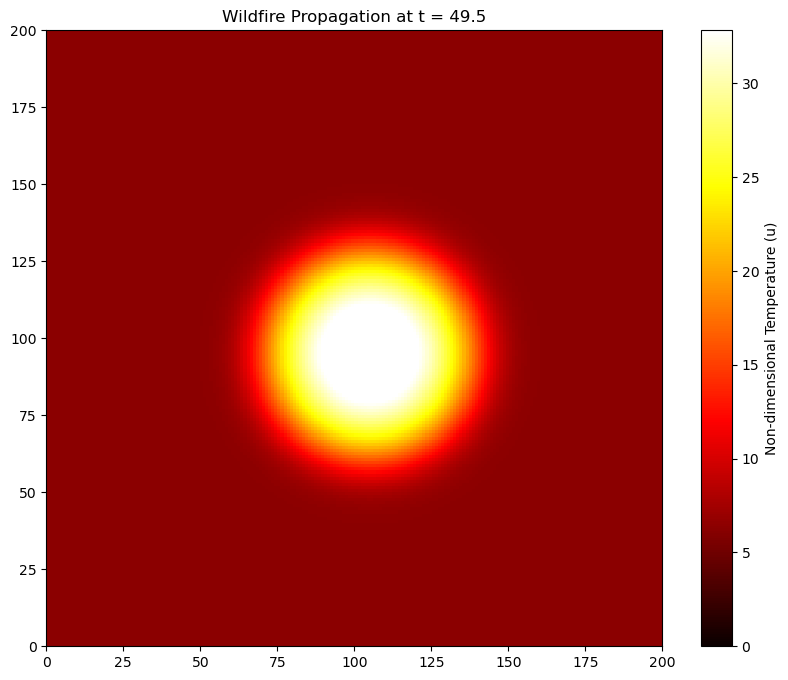

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
from tqdm import tqdm

# Parameters
L = 200.0
M = 200
dx = L / M
epsilon = 0.03
kappa = 0.1
alpha = 1e-3
q_react = 1.0
u_pc = 0.0
w0 = np.array([0.1, 0.1])
dt = 0.1
total_time = 50.0
steps = int(total_time / dt)
plot_interval = 5  # Update animation every 5 steps

# Initialize grid
x = np.linspace(dx/2, L - dx/2, M)
y = np.linspace(dx/2, L - dx/2, M)
X, Y = np.meshgrid(x, y)

# Initial conditions
u0 = 30.0 * np.exp(-((X - L/2)**2 + (Y - L/2)**2) / (10**2))
v0 = np.where(u0 > 1e-3, 1.0, 0.2)

# Preallocate storage for animation frames
frames = []
current_u = u0.copy()
current_v = v0.copy()

# Create figure and color normalization
fig, ax = plt.subplots(figsize=(10, 8))
norm = colors.Normalize(vmin=0, vmax=u0.max()*1.1)
img = ax.imshow(current_u, cmap='hot', extent=[0, L, 0, L], norm=norm)
plt.colorbar(img, label='Non-dimensional Temperature (u)')
title = ax.set_title('Wildfire Propagation at t = 0.0')

def K(u):
    return kappa * (1 + epsilon * u)**3 + 1

def reaction_step(u, v, dt_half):
    zeta = np.where(u >= u_pc, 10.0, 1.0) * np.exp(u / (1 + epsilon * u))
    v_new = v / (1 + dt_half * (epsilon / q_react) * zeta)
    u_new = u + dt_half * zeta * v_new
    return u_new, v_new

def convection_diffusion_step(u, dt_step, w0):
    # Simplified convection-diffusion (replace with proper WENO5/central differences)
    u_padded = np.pad(u, 2, mode='edge')
    
    # Simple upwind scheme for demonstration
    flux_x = w0[0] * (u_padded[2:-2, 2:-2] - u_padded[2:-2, 1:-3]) / dx
    flux_y = w0[1] * (u_padded[2:-2, 2:-2] - u_padded[1:-3, 2:-2]) / dx
    
    # Simple diffusion
    K_vals = K(u)
    laplacian = (np.roll(K_vals*u, 1, axis=0) + np.roll(K_vals*u, -1, axis=0) +
                np.roll(K_vals*u, 1, axis=1) + np.roll(K_vals*u, -1, axis=1) - 
                4*K_vals*u) / dx**2
    
    return u + dt_step * (-flux_x - flux_y + 0.5*laplacian - alpha*u)

# Main simulation with progress bar
for step in tqdm(range(steps), desc='Simulating'):
    # Strang splitting
    current_u, current_v = reaction_step(current_u, current_v, dt/2)
    current_u = convection_diffusion_step(current_u, dt, w0)
    current_u, current_v = reaction_step(current_u, current_v, dt/2)
    
    # Store frame at specified intervals
    if step % plot_interval == 0:
        frames.append((current_u.copy(), step*dt))

# Animation function
def update(frame):
    u_data, time = frame
    img.set_data(u_data)
    title.set_text(f'Wildfire Propagation at t = {time:.1f}')
    return img, title

# Create animation
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Uncomment to save as video (requires ffmpeg)
ani.save('simplified_cdr.mp4', writer='ffmpeg', fps=15)

plt.show()

🔥 Simulating:   0%|          | 0.0/0.05 [01:05<836:46:06] 


KeyboardInterrupt: 

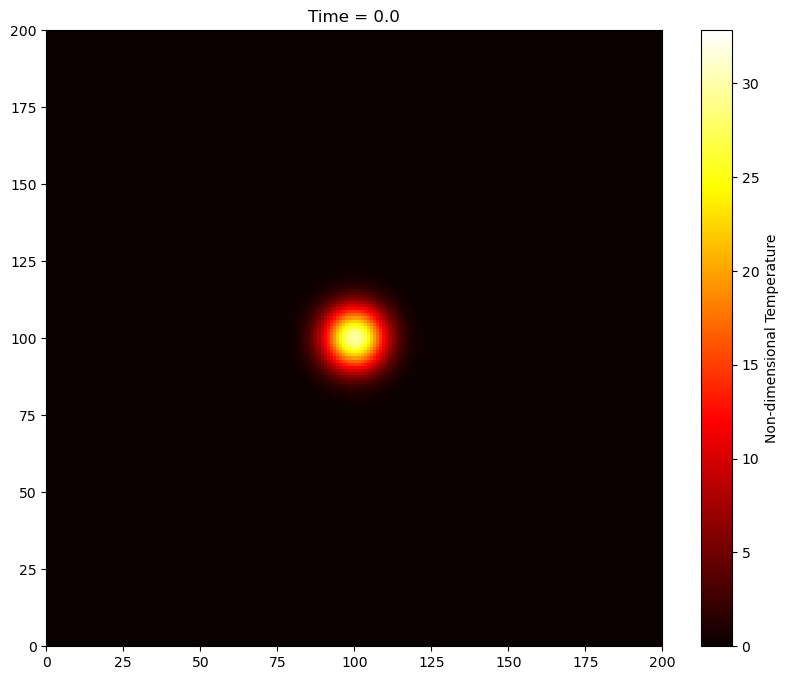

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
from tqdm import tqdm

# ========================
# Parameters
# ========================
L = 200.0               # Domain size
M = 200                 # Spatial discretization
dx = L / M              # Spatial step
epsilon = 0.03          # Non-dim. inverse activation energy
kappa = 0.1             # Conductivity coefficient
alpha = 1e-3            # Natural convection coefficient
q_react = 1.0           # Reaction heat
u_pc = 0.0              # Phase change temperature
w0 = np.array([0.1, 0.1])  # Wind vector
total_time = 0.05       # Total simulation time
plot_interval = 5       # Animation update interval

# ========================
# Initial Conditions
# ========================
x = np.linspace(dx/2, L - dx/2, M)
y = np.linspace(dx/2, L - dx/2, M)
X, Y = np.meshgrid(x, y)

# Gaussian initial temperature
u0 = 30.0 * np.exp(-((X - L/2)**2 + (Y - L/2)**2) / 100)
v0 = np.where(u0 > 1e-3, 1.0, 0.2)  # Fuel distribution

# ========================
# Numerical Core Functions
# ========================
def K(u):
    """Diffusion coefficient function."""
    return kappa * (1 + epsilon * u)**3 + 1

def weno5_reconstruct(stencil, eps=1e-6):
    """5th-order WENO reconstruction."""
    vmm, vm, v0, vp, vpp = stencil
    beta0 = 13/12*(vmm-2*vm+v0)**2 + 1/4*(vmm-4*vm+3*v0)**2
    beta1 = 13/12*(vm-2*v0+vp)**2 + 1/4*(vm-vp)**2
    beta2 = 13/12*(v0-2*vp+vpp)**2 + 1/4*(3*v0-4*vp+vpp)**2
    
    alpha0 = 0.1 / (eps + beta0)**2
    alpha1 = 0.6 / (eps + beta1)**2
    alpha2 = 0.3 / (eps + beta2)**2
    alpha_sum = alpha0 + alpha1 + alpha2
    
    p0 = (3*vmm - 10*vm + 15*v0)/8
    p1 = (-vm + 6*v0 + 3*vp)/8
    p2 = (3*v0 + 6*vp - vpp)/8
    
    return (alpha0*p0 + alpha1*p1 + alpha2*p2) / alpha_sum

def convective_flux(u, w_dir, axis):
    """Calculate WENO5 fluxes with proper BC handling."""
    u_padded = np.pad(u, ((3,3), (3,3)), mode='reflect')
    flux = np.zeros_like(u)
    
    for i in range(3, M+3):
        for j in range(3, M+3):
            if axis == 0:  # x-direction
                stencil = u_padded[i-3:i+2, j]
            else:  # y-direction
                stencil = u_padded[i, j-3:j+2]
            
            flux_val = w_dir * weno5_reconstruct(stencil)
            flux[i-3, j-3] = flux_val
            
    return flux

def diffusion_operator(u):
    """Paper's diffusion discretization with zero-flux BCs."""
    K_vals = np.clip(K(u), 1e-3, 1e3)  # Prevent extreme diffusivities
    K_vals = K(u)
    diff = np.zeros_like(u)
    u_padded = np.pad(u, 1, mode='reflect')
    K_padded = np.pad(K_vals, 1, mode='edge')
    
    for i in range(M):
        for j in range(M):
            ip = i+1  # Padded indices
            jp = j+1
            
            # x-direction terms
            K_left = 0.5*(K_padded[ip-1,jp] + K_padded[ip,jp])
            K_right = 0.5*(K_padded[ip,jp] + K_padded[ip+1,jp])
            term_x = (K_left*(u_padded[ip-1,jp] - u_padded[ip,jp]) 
                    - K_right*(u_padded[ip,jp] - u_padded[ip+1,jp]))/dx**2
            
            # y-direction terms
            K_bottom = 0.5*(K_padded[ip,jp-1] + K_padded[ip,jp])
            K_top = 0.5*(K_padded[ip,jp] + K_padded[ip,jp+1])
            term_y = (K_bottom*(u_padded[ip,jp-1] - u_padded[ip,jp]) 
                    - K_top*(u_padded[ip,jp] - u_padded[ip,jp+1]))/dx**2
            
            diff[i,j] = term_x + term_y
            
    return diff

# ========================
# Time Integration
# ========================
gamma = 1 - np.sqrt(2)/2  # IMEX-RK parameter
a_im = np.array([[gamma, 0], [1-gamma, gamma]])
b_im = np.array([1-gamma, gamma])
a_ex = np.array([[0, 0], [gamma, 0]])

def imex_step(u, dt):
    """H-LDIRK3(2,2,2) time stepping."""
    # Add diffusion stabilization
    u = np.clip(u, 0, 100)  # Clamping to prevent negative values

    # Stage 1
    L0 = (convective_flux(u, w0[0], 0) + 
         convective_flux(u, w0[1], 1) - alpha*u)
    
    # Stage 2
    rhs = u + dt*a_ex[1,0]*L0
    U1 = np.linalg.solve(np.eye(M) - dt*a_im[1,1]*diffusion_operator(u), rhs)
    L1 = (convective_flux(U1, w0[0], 0) + 
         convective_flux(U1, w0[1], 1) - alpha*U1)
    
    # Combine stages
    return u + dt*(b_im[0]*diffusion_operator(u) + b_im[1]*diffusion_operator(U1)
                 + dt*(b_im[0]*L0 + b_im[1]*L1))

# ========================
# Reaction Steps
# ========================
def reaction_step(u, v, dt_half):
    """Stabilized reaction update with fuel-limited burning."""
    # Physical bounds
    u = np.clip(u, 0, 70)  # Reduced from 100 to match theoretical max
    v = np.clip(v, 0, 1)
    
    # Stabilized exponent calculation
    exponent = np.clip(u / (1 + epsilon*u), None, 50)  # exp(50) ≈ 5e21
    zeta = np.where(u >= u_pc, 10.0, 1.0) * np.exp(exponent)
    
    # Fuel-limited reaction
    safe_zeta = np.nan_to_num(zeta, nan=0.0, posinf=0.0, neginf=0.0)
    reaction_rate = np.minimum(safe_zeta * v, 1e5)  # Limit reaction rate
    
    # Update equations
    v_new = v / (1 + dt_half*(epsilon/q_react)*reaction_rate)
    u_new = u + dt_half * reaction_rate * v_new
    
    return np.clip(u_new, 0, 70), np.clip(v_new, 0, 1)

def calculate_dt(u, v):
    """Dynamic time step considering reaction rates."""
    # CFL condition for convection
    conv_dt = 0.25 * dx / (np.linalg.norm(w0) + 1e-12)
    
    # Reaction rate limitation
    zeta = np.exp(np.clip(u/(1+epsilon*u), None, 50))
    react_dt = 0.1 / (np.max(zeta*v) + 1e-12)
    
    return min(conv_dt, react_dt, 0.1)

# ========================
# Main Simulation
# ========================
def run_simulation():
    global w0, alpha
    
    # Initialize
    u, v = u0.copy(), v0.copy()
    frames = []
    current_time = 0.0
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    norm = colors.Normalize(vmin=0, vmax=u0.max()*1.1)
    img = ax.imshow(u, cmap='hot', extent=[0, L, 0, L], norm=norm)
    plt.colorbar(img, label='Non-dimensional Temperature')
    title = ax.set_title(f'Time = {current_time:.1f}')
    
    # Initialize progress bar with time-based formatting
    with tqdm(total=total_time, desc='🔥 Simulating', unit='s', 
             bar_format='{l_bar}{bar}| {n:.1f}/{total_fmt} [{elapsed}<{remaining}]') as pbar:
        
        while current_time < total_time:
            # Adaptive time stepping
            dt = calculate_dt(u, v)
            if current_time + dt > total_time:
                dt = total_time - current_time
            
            # Strang splitting
            u, v = reaction_step(u, v, dt/2)
            u = imex_step(u, dt)
            u, v = reaction_step(u, v, dt/2)
            
            # Update progress bar
            pbar.update(dt)
            pbar.set_postfix({
                'u_max': f'{np.max(u):.1f}',
                'v_min': f'{np.min(v):.2f}',
                'wind': f'({w0[0]:.2f}, {w0[1]:.2f})'
            })
            
            # Store frame
            if int(current_time/dt) % plot_interval == 0:
                frames.append((u.copy(), current_time))
            
            current_time += dt

            # Error checking
            if np.any(np.isnan(u)) or np.any(np.isnan(v)):
                raise RuntimeError("NaN values detected - simulation diverged!")
    
    # Create animation
    ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
    plt.close()  # Close figure to prevent duplicate displays
    return ani

# Run the simulation
ani = run_simulation()

# To save animation (requires ffmpeg):
ani.save('simplified_cdr.mp4', writer='ffmpeg', fps=15)
